#**Data Analysis of Google App's Ratings**

###**Aim**: *To deliver insights to understand customer demands better and thus help developers to popularise the product.*




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**Read Data**
The dataset is chosen from kaggle

In [2]:
df= pd.read_csv('googleplaystore.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()           #Inspecting the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.shape

(10841, 13)

In [7]:
df.describe()         #Summary Statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


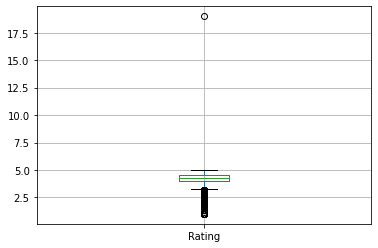

In [8]:
df.boxplot();

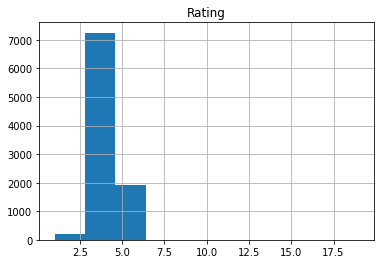

In [9]:
df.hist();

##**DATA CLEANING**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


####**Count the number of missing values in the Dataset**

In [11]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Counting the number of missing values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

####**Checking for Outliers in our data**

In [13]:
 df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df.drop([10472],inplace=True)

In [15]:
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


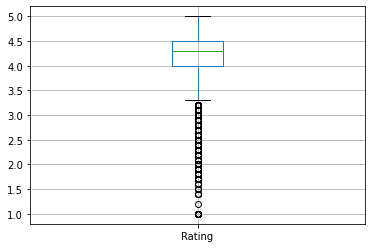

In [16]:
df.boxplot();

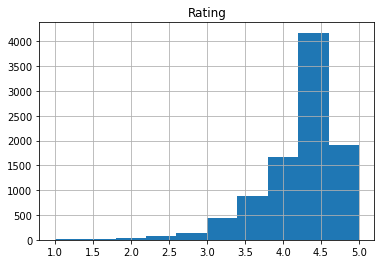

In [17]:
df.hist();

###**Removing columns that are 90% empty**

In [18]:
threshold= len(df)*0.1 
threshold

1084.0

In [19]:
df.dropna(thresh=threshold,axis=1,inplace=True)

In [20]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [21]:
df.shape

(10840, 13)

##**Data Imputation and Manipulation**

Filling the **null values** with appropriate values using aggregate functions such as **mean,median or mode**

In [22]:
#Defing a function; numerical values are filled with median
def impute_median(series):
  return series.fillna(series.median())

In [23]:
df.Rating = df['Rating'].transform(impute_median)

In [24]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [25]:
#modes of categorial values
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [26]:
#Categorial values are filled with mode
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)

In [27]:
#Counting the number of null values in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [29]:
#Converting Price, Reviews and Installs into Numerical Values
df['Price']= df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
df['Price']= df['Price'].apply(lambda x: float(x))

In [30]:
df['Reviews']= pd.to_numeric(df['Reviews'],errors='coerce')

In [31]:
df['Installs']= df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs']= df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Installs']= df['Installs'].apply(lambda x: float(x))

In [32]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [33]:
df.describe() #Summary statistics after cleaning

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


##**DATA VISUALIZATION**

In [34]:
grp=df.groupby('Category')
w=grp['Installs'].agg(np.mean)
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

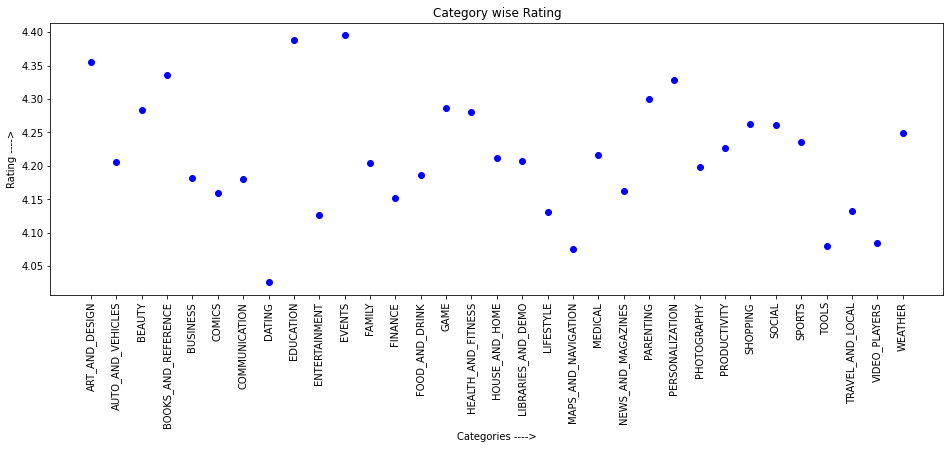

In [35]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories ---->')
plt.ylabel('Rating ---->')
plt.show()

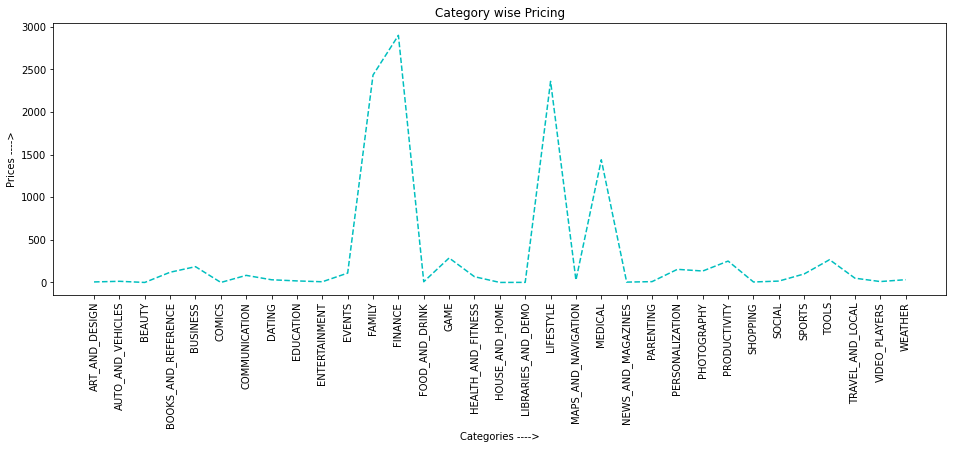

In [36]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='c')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories ---->')
plt.ylabel('Prices ---->')
plt.show()

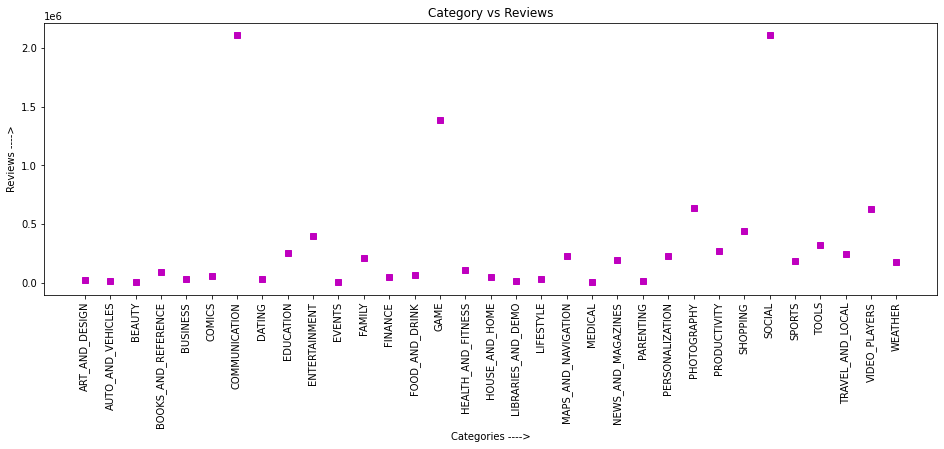

In [37]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs',color='m')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories ---->')
plt.ylabel('Reviews ---->')
plt.show()

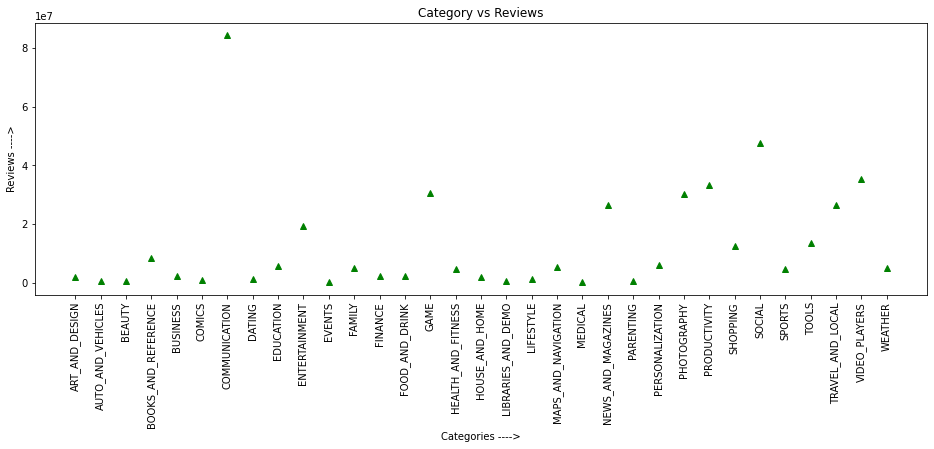

In [38]:
plt.figure(figsize=(16,5))
plt.plot(w,'g^',color='g')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories ---->')
plt.ylabel('Reviews ---->')
plt.show()

##**EDA**

In [39]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.063166,0.045496,-0.019318
Reviews,0.063166,1.000000,0.643122,-0.009667
Installs,0.045496,0.643122,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.011689,1.000000


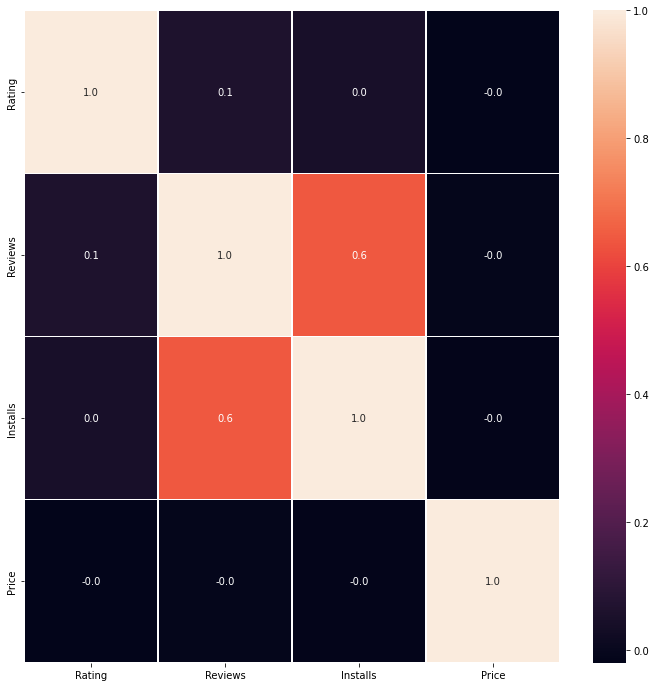

In [40]:
#Correlation map/heat map
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

In [41]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


###Category and Reviews

In [42]:
category_list=list(df['Category'].unique())
category_review=[]
for i in category_list:
  x=df[df['Category']==i]
  if(len(x)!=0):
    review=sum(x.Reviews)/len(x)
    category_review.append(review)
  else:
    review= sum(x.Reviews)
    category_review.append(review)

#Sorting
df_category_reviews=pd.DataFrame({'category':category_list,'review':category_review})
new_index= (df_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data= df_category_reviews.reindex(new_index)

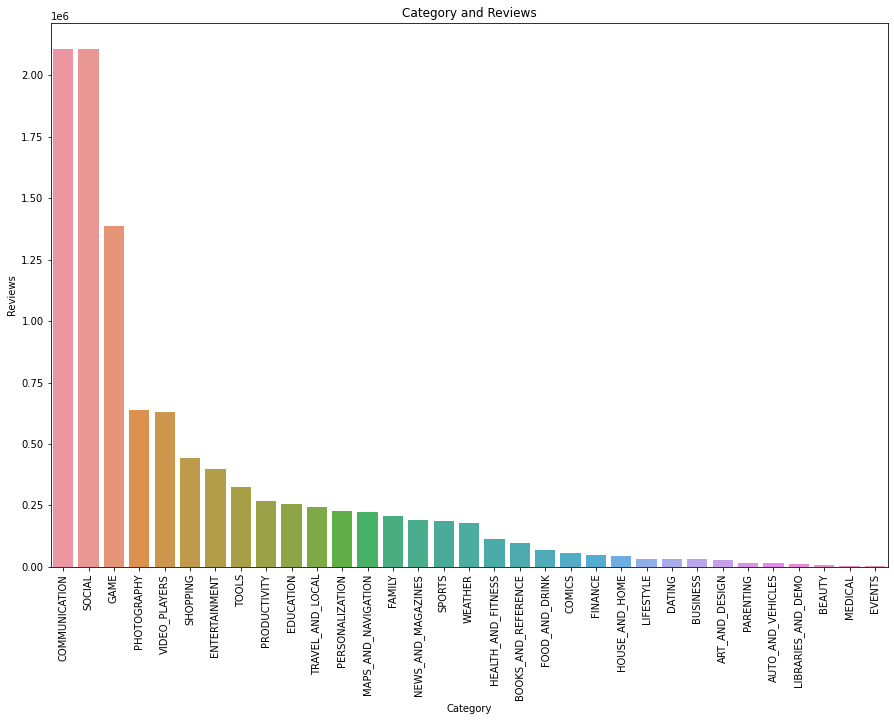

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'],y=sorted_data['review'])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

###Category and Installs

In [44]:
category_list=list(df['Category'].unique())
category_install=[]
for i in category_list:
  x=df[df['Category']==i]
  if(len(x)!=0):
    install=sum(x.Installs)/len(x)
    category_install.append(install)
  else:
    install= sum(x.Installs)
    category_install.append(install)

#Sorting
df_category_install=pd.DataFrame({'category':category_list,'install':category_install})
new_index= (df_category_install['install'].sort_values(ascending=False)).index.values
sorted_data= df_category_install.reindex(new_index)

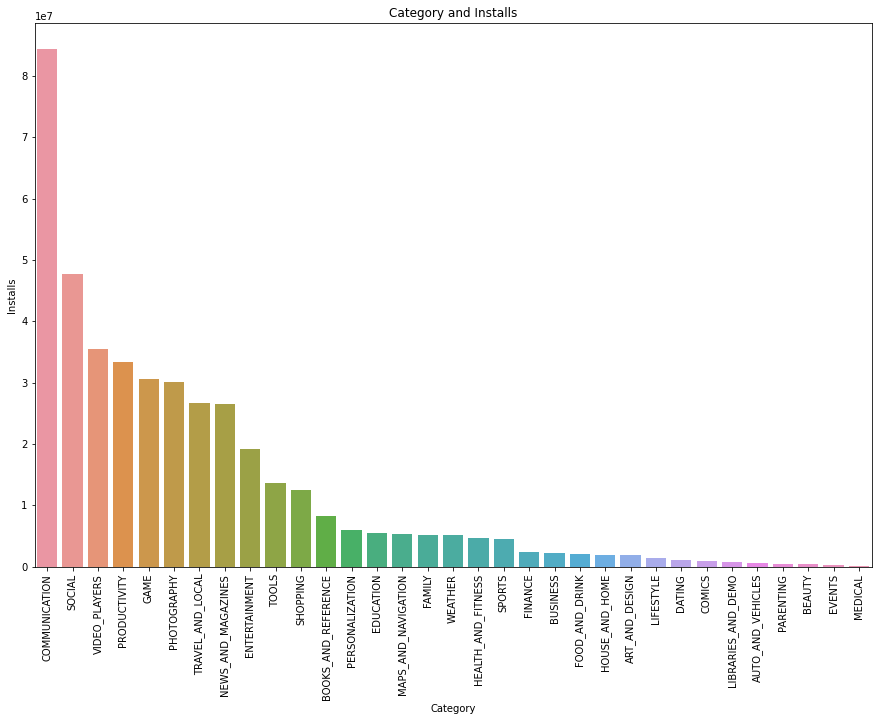

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'],y=sorted_data['install'])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category and Installs")
plt.show()

Content Rating

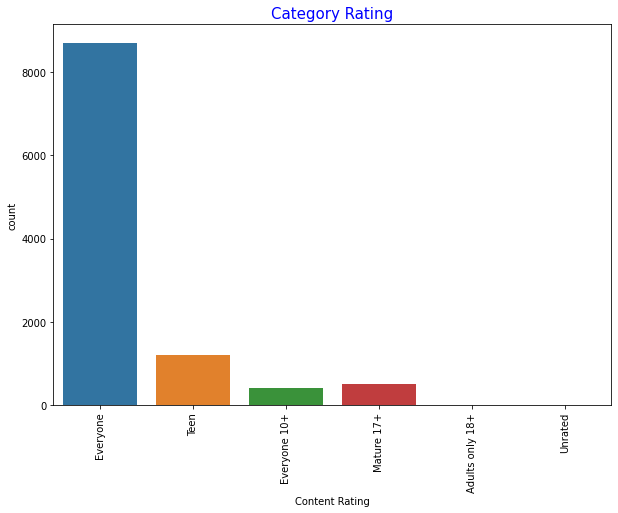

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Content Rating')
plt.xticks(rotation=90)
plt.title("Category Rating",color='blue',fontsize=15)
plt.show()

Q. What are the Top 20 apps present in the google play store as per the Genres?

In [47]:
top_genres= df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs=df.groupby(['Genres'])[['Installs']].sum()
top_genres_installs= pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs=top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


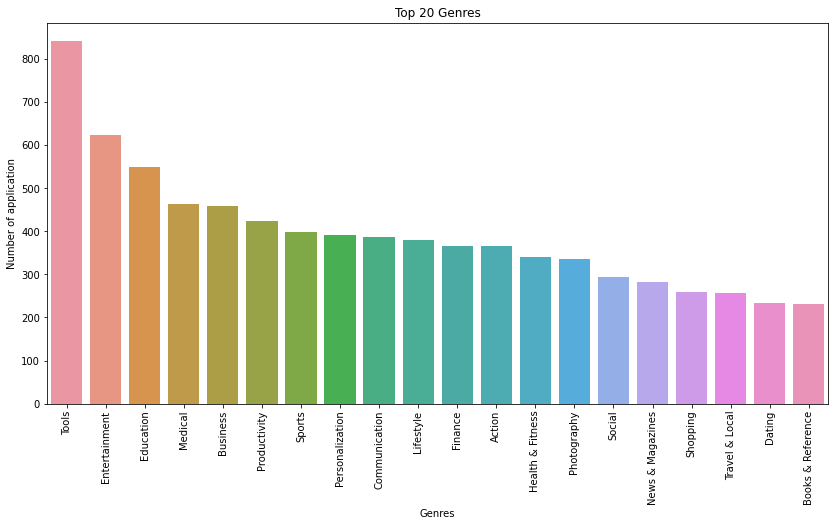

In [48]:
plt.figure(figsize=(14,7))
sns.barplot(top_20_genres_installs. Genres,top_20_genres_installs.Count)
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
plt.show()

Q. Which are the Genres that are installed the most in the Top 20 Genres? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


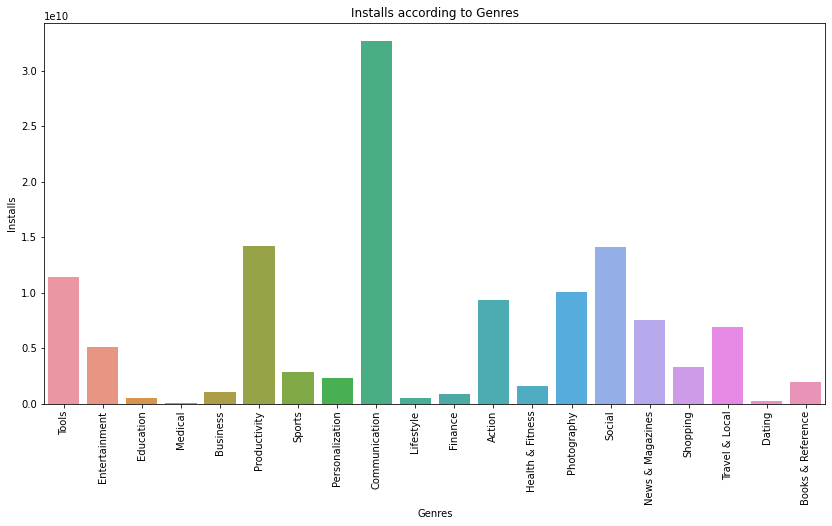

In [49]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs. Genres,top_20_genres_installs.Installs)
plt.show()

Average Rating

In [50]:
genres_rating_df= df.groupby(['Genres'])[["Rating"]].mean()
genres_installs_ratings= pd.merge(top_genres_installs, genres_rating_df,on='Genres')
genres_installs_ratings['Rating'].describe()

count    119.000000
mean       4.267701
std        0.170099
min        3.800000
25%        4.179848
50%        4.280059
75%        4.350000
max        4.800000
Name: Rating, dtype: float64

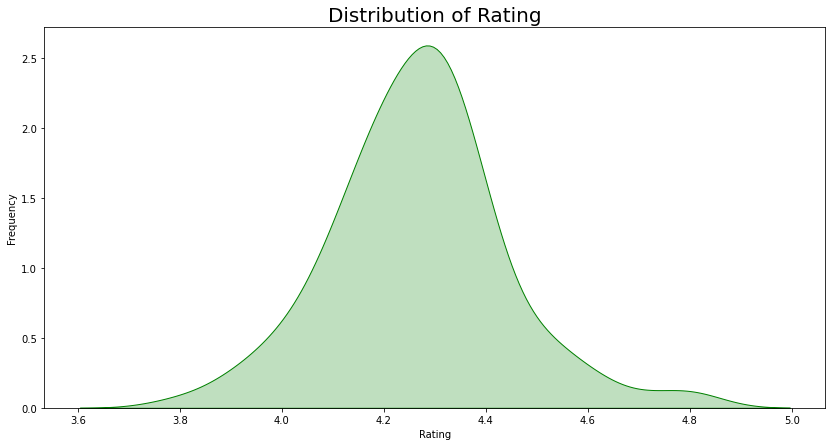

In [51]:
plt.figure(figsize=(14,7))
g=sns.kdeplot(genres_installs_ratings.Rating, color='Green', shade= True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size=20)
plt.show()

Q. Highest and Lowest rated genres

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


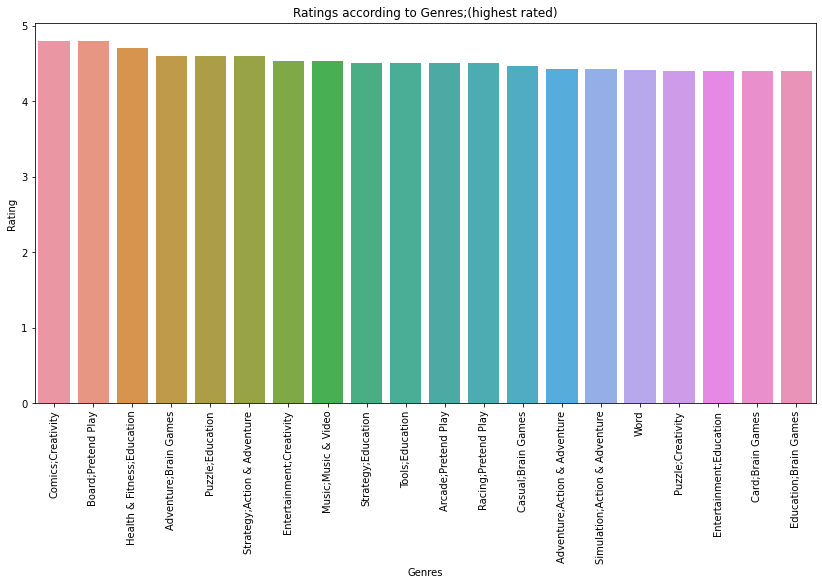

In [52]:
genres_installs_ratings.sort_values('Rating',ascending= False, inplace=True)
highest_rated_genres= genres_installs_ratings.iloc[0:20]
lowest_rated_genres= genres_installs_ratings.iloc[-20:]
lowest_rated_genres= lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Ratings")
plt.title("Ratings according to Genres;(highest rated)")
sns.barplot(highest_rated_genres. Genres,highest_rated_genres.Rating)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


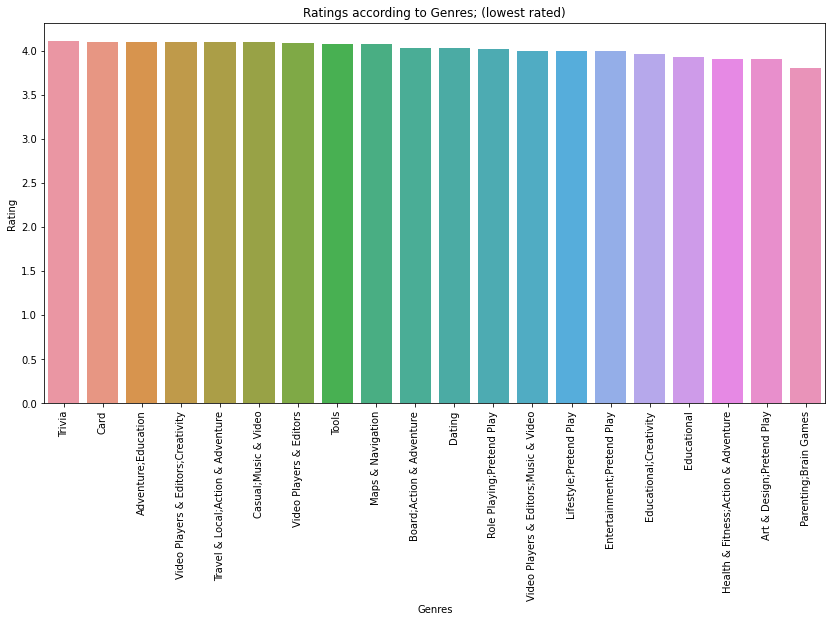

In [53]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Ratings")
plt.title("Ratings according to Genres; (lowest rated)")
sns.barplot(lowest_rated_genres. Genres,lowest_rated_genres.Rating)
plt.show()

Q. What are the count of application in each category differtiated by their type

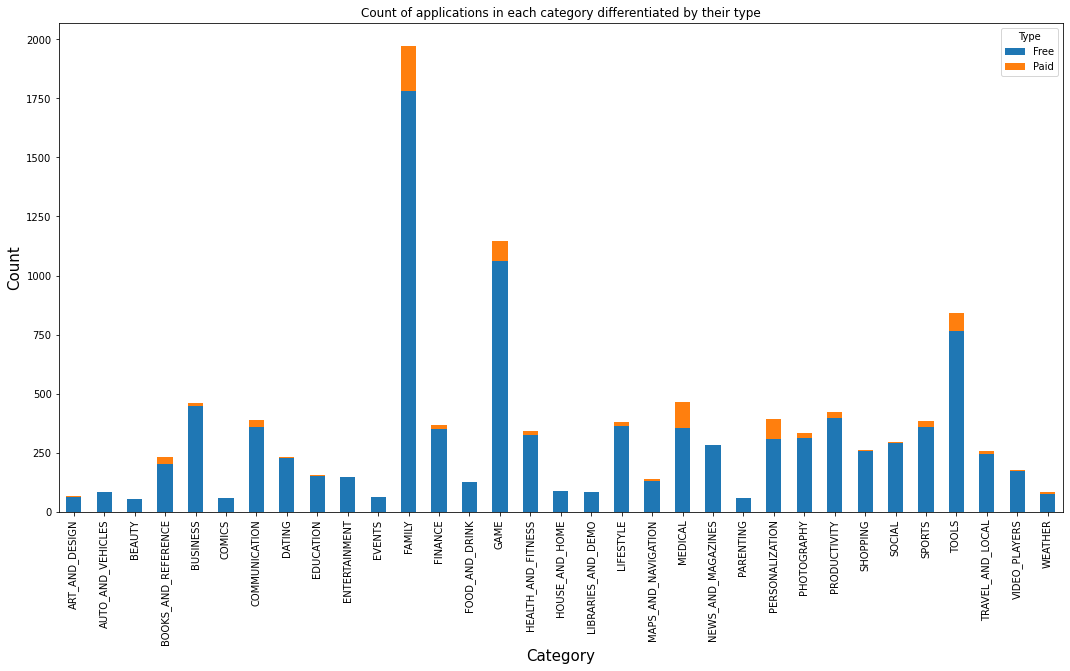

In [54]:
app_count= df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count= app_count.pivot('Category','Type','Count').fillna(0).reset_index()
df_app_count.set_index('Category').plot(kind='bar',stacked=True, figsize=(18,9))
plt.xlabel("Category",fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

Q. How many apps were installed according to its type

In [ ]:
df['Gaming Category App']= df['Category']== 'GAME'
category_type_installs= df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
category_type_installs['log_Installs']= np.log10(category_type_installs['Installs'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot('Category','log_Installs', hue='Type', df= category_type_installs)
plt.show()

Histogram of size

In [55]:
#to remove null values from size column
df.loc[df["Size"].isnull(),'Size']=0

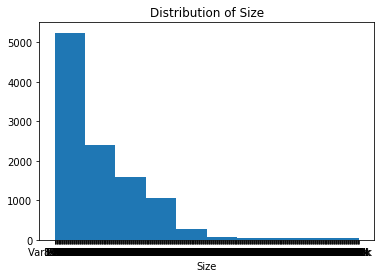

In [56]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(df['Size']);
plt.show()

Q. What is the distribution of type of reviews in the dataset?   9:27/10:54

In [57]:
user_reviews_df= pd.read_csv('googleplaystore_user_reviews.csv')

In [58]:
#Merging dataframes on apps
merged_df= df.merge(user_reviews_df, on="App")
category_sentiment= merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


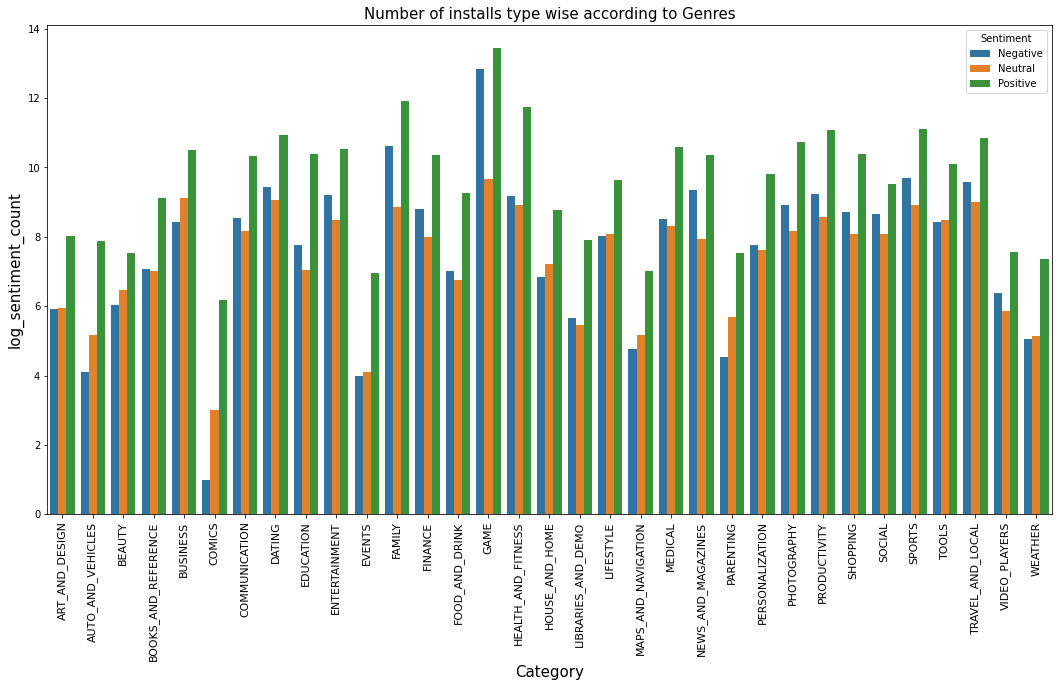

In [59]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Installs",fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category','log_sentiment_count',hue='Sentiment',data=category_sentiment);

Histogram Of Subjectivity

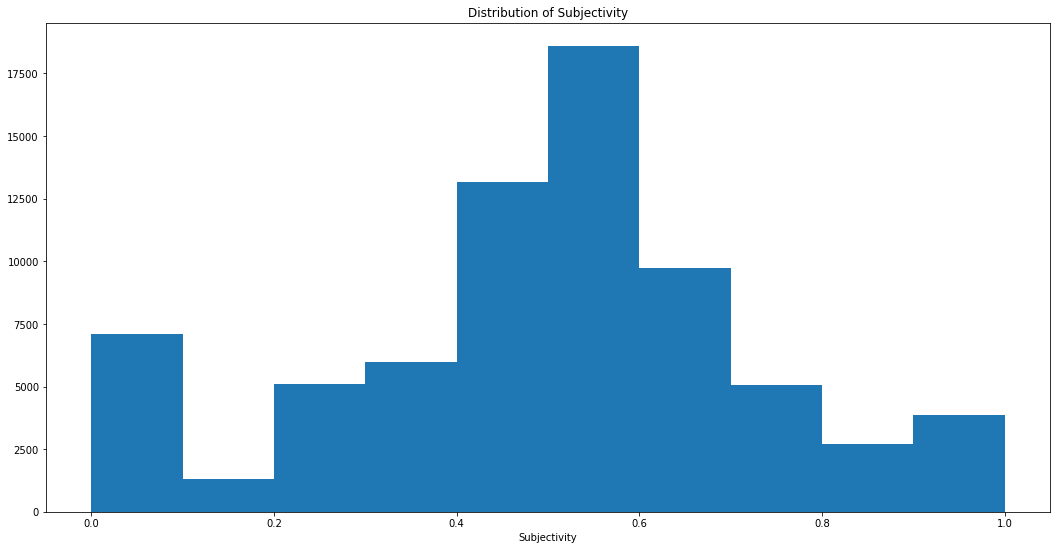

In [60]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df["Sentiment_Subjectivity"].notnull()]['Sentiment_Subjectivity'])
plt.show()

Percentage of Review Sentiments

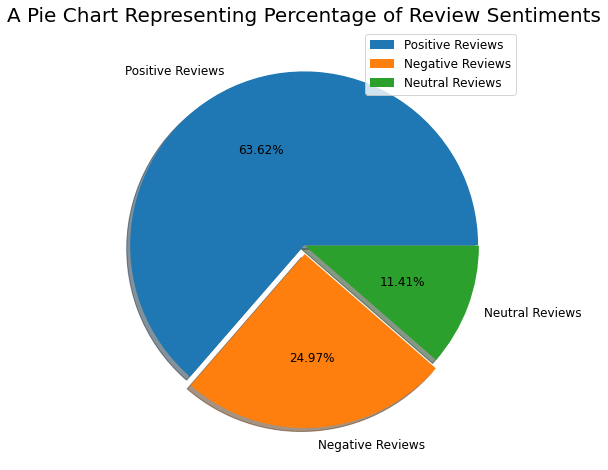

In [61]:
import matplotlib
counts= list(merged_df['Sentiment'].value_counts())
labels= 'Positive Reviews','Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(8,8)
plt.pie(counts,labels=labels,explode=[0,0.05,0.005],shadow=True,autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments',fontsize=20)
plt.axis('off')
plt.legend()
plt.show()